In [1]:
import xarray as xr
#ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr')
#ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2022-6h-512x256_equiangular_conservative.zarr')
ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-full_37-1h-512x256_equiangular_conservative.zarr')
#ds.close()
#ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-full_37-1h-1440x721.zarr')
#ds_hres=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-full_37-1h-1440x721.zarr')

<xarray.DataArray 'latitude' (latitude: 256)> Size: 2kB
array([-89.648437, -88.945312, -88.242187, ...,  88.242187,  88.945312,
        89.648437])
Coordinates:
  * latitude  (latitude) float64 2kB -89.65 -88.95 -88.24 ... 88.24 88.95 89.65
(array([385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412]),)
(array([ 85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113]),)
(512, 256)
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

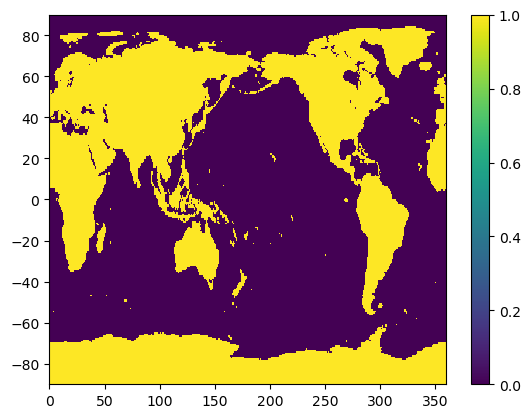

In [4]:
#print(ds.keys())
print(ds['latitude'])
lat=ds['latitude'][:].data
lon=ds['longitude'][:].data
region_bounds = {
    "lat_min": -30.0,
    "lat_max": -10.0,
    "lon_min": -90.0,
    "lon_max": -70.0
}
import numpy as np
a=np.where((lon>region_bounds['lon_min']+360) & (lon<region_bounds['lon_max']+360))
b=np.where((lat>region_bounds['lat_min']) & (lat<region_bounds['lat_max']))
print(a)
print(b)
land_sea_mask=ds['land_sea_mask'][:].data
print(land_sea_mask.shape)


land_sea_local=land_sea_mask[:,:]
ny,nx=land_sea_local.shape
land_sea_np=np.zeros((ny,nx))+1
land_sea_np[land_sea_local<0.01]=0

import matplotlib.pyplot as plt
plt.pcolormesh(lon,lat,land_sea_np.T)
plt.colorbar()


print(land_sea_np)
# select np random points from the sea
np.random.seed(0)
n=100
a_sea=np.where(land_sea_np==0)
idx=np.random.choice(len(a_sea[0]),n)
print(land_sea_np[a_sea[0][idx],a_sea[1][idx]])
#print(land_sea_mask[:].data[a_sea][idx])

In [6]:
import numpy as np

ind_lon_min,ind_lon_max=366,414 #366 414
ind_lat_min,ind_lat_max=160,208
ind_lon_min,ind_lon_max=a[0][0],a[0][-1]
ind_lat_min,ind_lat_max=b[0][0],b[0][-1]
tpw=ds['total_column_water_vapour'][0,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
tp=ds['total_precipitation'][0,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max]
print(tpw.shape)
#[0,ind_lat_min:ind_lat_max,ind_lon_min:ind_lon_max]
print(ind_lat_min,ind_lat_max,ind_lon_min,ind_lon_max)
#print(180/256)
#print(ds['u_component_of_wind'])
#print(ds['total_precipitation'])
#print(ds['total_column_water_vapour'])
print(ds['time'].shape)
import datetime
year=2008
first_day=datetime.datetime(year,10,21)
dt=first_day-datetime.datetime(1959,1,1)
nstart=dt.days*24
print(ds['time'][nstart])
#a=np.arange(0,10,3)
#print(a)
levels=ds['level'][10:]
i_levels=range(10,37)
print(levels)

(27, 28)
85 113 385 412
(561264,)
<xarray.DataArray 'time' ()> Size: 8B
array('2008-10-21T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2008-10-21
<xarray.DataArray 'level' (level: 27)> Size: 216B
array([ 100,  125,  150,  175,  200,  225,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  775,  800,  825,  850,  875,  900,  925,
        950,  975, 1000])
Coordinates:
  * level    (level) int64 216B 100 125 150 175 200 225 ... 900 925 950 975 1000


In [ ]:
time=ds['time'][:].data
print(time[0])
import datetime
tpwL=[]
level=ds['level'][:].data
#levels=[5,7,9,10,12]
#p_levels=levels
levels=i_levels
for year in range(2018,2019):
    first_day=datetime.datetime(year,10,1)
    dt=first_day-datetime.datetime(1959,1,1)
    nstart=dt.days*24
    nend=nstart+24*30
    ichoice=np.random.choice(nend-nstart+1,10)
    print(ds['time'][nstart+ichoice])
    for itime in ichoice:
        tpw=ds['total_column_water_vapour'][nstart+itime:nstart+itime+2,:,:].data
        tp=ds['total_precipitation'][nstart+itime:nstart+itime+2,:,:].data
        geopotential=ds['geopotential'][nstart+itime:nstart+itime+2,:,:,:].data
        qv=ds['specific_humidity'][nstart+itime:nstart+itime+2,:,:,:].data
        temp_2m=ds['2m_temperature'][nstart+itime:nstart+itime+2,:,:].data
        mean_sea_level_pressure=ds['mean_sea_level_pressure'][nstart+itime:nstart+itime+2,:,:].data
        #total_cloud_cover=ds['total_cloud_cover'][nstart+itime:nstart+itime+2,:,:].data
        total_column_water=ds['total_column_water'][nstart+itime:nstart+itime+2,:,:].data
        u_10m=ds['10m_u_component_of_wind'][nstart+itime:nstart+itime+2,:,:].data
        v_10m=ds['10m_v_component_of_wind'][nstart+itime:nstart+itime+2,:,:].data
        temperature=ds['temperature'][nstart+itime:nstart+itime+2,:,:,:].data
        tp_xr=xr.DataArray(tp,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        tpw_xr=xr.DataArray(tpw,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        print(qv.shape)
        print(level.shape)
        qv_xr=xr.DataArray(qv,dims=['time','lev','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lev':level,'lon':lon,'lat':lat})
        geopotential_xr=xr.DataArray(geopotential,dims=['time','lev','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lev':level,'lon':lon,'lat':lat})
        temp_2m_xr=xr.DataArray(temp_2m,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        temperature_xr=xr.DataArray(temperature,dims=['time','lev','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lev':level,'lon':lon,'lat':lat})
        mean_sea_level_pressure_xr=xr.DataArray(mean_sea_level_pressure,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        u_10m_xr=xr.DataArray(u_10m,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        v_10m_xr=xr.DataArray(v_10m,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})
        total_column_water_xr=xr.DataArray(total_column_water,dims=['time','lon','lat'],coords={'time':time[nstart+itime:nstart+itime+2],'lon':lon,'lat':lat})

        ds_out=xr.Dataset({'total_column_water_vapour':tpw_xr,'total_precipitation':tp_xr,'geopotential':geopotential_xr,'mean_sea_level_pressure':mean_sea_level_pressure_xr,'temperature_2m':temp_2m_xr,'specific_humidity':qv_xr,'total_column_water':total_column_water_xr,'u_10m':u_10m_xr,'v_10m':v_10m_xr,'temperature':temperature_xr})
        fname_out='weatherbench2_hourly_rand_sel_%s.nc'%(str(ds['time'][nstart+itime].data)[:-10])
        comp = dict(zlib=True, complevel=5)
        encoding = {var: comp for var in ds_out.data_vars}
        ds_out.to_netcdf(fname_out,encoding=encoding)
        #break
    break
    #tp_year=ds['total_precipitation'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #u_wind_year=ds['u_component_of_wind'][nstart:nend:3,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #v_wind_year=ds['v_component_of_wind'][nstart:nend:3,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #print(nstart,nend)
    #print(ds['geopotential'])
    #u_10m=ds['10m_u_component_of_wind'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #v_10m=ds['10m_v_component_of_wind'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #temperature=ds['temperature'][nstart:nend,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #geopotential_year=ds['geopotential'][nstart:nend,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #qv=ds['specific_humidity'][nstart:nend,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #temp_2m_year=ds['2m_temperature'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #mean_sea_level_pressure_year=ds['mean_sea_level_pressure'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #tpw_xr=xr.DataArray(tpw_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #tp_xr=xr.DataArray(tp_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #qv_xr=xr.DataArray(qv,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #total_cloud_cover=ds['total_cloud_cover'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #total_cloud_cover_xr=xr.DataArray(total_cloud_cover,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #total_column_water=ds['total_column_water'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #total_column_water_xr=xr.DataArray(total_column_water,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #u_wind_xr=xr.DataArray(u_wind_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend:3],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #v_wind_xr=xr.DataArray(v_wind_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend:3],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #geopotential_xr=xr.DataArray(geopotential_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #mean_sea_level_pressure_xr=xr.DataArray(mean_sea_level_pressure_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #temp_2m_year_xr=xr.DataArray(temp_2m_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #surface_pressure_year=ds['surface_pressure'][nstart:nend,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    #surface_pressure_year_xr=xr.DataArray(surface_pressure_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #u_10m_xr=xr.DataArray(u_10m,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #v_10m_xr=xr.DataArray(v_10m,dims=['time','lon','lat'],coords={'time':time[nstart:nend],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #temperature_xr=xr.DataArray(temperature,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    #ds_out=xr.Dataset({'total_column_water_vapour':tpw_xr,'total_precipitation':tp_xr,'geopotential':geopotential_xr,'mean_sea_level_pressure':mean_sea_level_pressure_xr,'temperature_2m':temp_2m_year_xr,'surface_pressure':surface_pressure_year_xr,'specific_humidity':qv_xr,'total_cloud_cover':total_cloud_cover_xr,'total_column_water':total_column_water_xr,'u_10m':u_10m_xr,'v_10m':v_10m_xr,'temperature':temperature_xr})
    #comp = dict(zlib=True, complevel=5)
    #encoding = {var: comp for var in ds_out.data_vars}
    #print(first_day,year)
    #ds_out.to_netcdf('weatherbench2_vocals_hourly_subset_%4.4i.nc'%year,encoding=encoding)
    #break
#print(time[nstart])

1959-01-01T00:00:00.000000000
<xarray.DataArray 'time' (time: 30)> Size: 240B
array(['2008-10-07T03:00:00.000000000', '2008-10-25T08:00:00.000000000',
       '2008-10-19T23:00:00.000000000', '2008-10-04T15:00:00.000000000',
       '2008-10-01T13:00:00.000000000', '2008-10-14T02:00:00.000000000',
       '2008-10-25T17:00:00.000000000', '2008-10-06T00:00:00.000000000',
       '2008-10-30T19:00:00.000000000', '2008-10-12T17:00:00.000000000',
       '2008-10-18T18:00:00.000000000', '2008-10-20T14:00:00.000000000',
       '2008-10-12T20:00:00.000000000', '2008-10-12T12:00:00.000000000',
       '2008-10-14T12:00:00.000000000', '2008-10-23T06:00:00.000000000',
       '2008-10-10T11:00:00.000000000', '2008-10-25T19:00:00.000000000',
       '2008-10-27T23:00:00.000000000', '2008-10-24T21:00:00.000000000',
       '2008-10-28T05:00:00.000000000', '2008-10-22T13:00:00.000000000',
       '2008-10-11T16:00:00.000000000', '2008-10-06T16:00:00.000000000',
       '2008-10-09T15:00:00.000000000', '2008-

In [26]:
print(str(ds['time'][nstart+itime].data)[:-10])

2008-10-28T09:00:00


(24, 27, 27, 28)


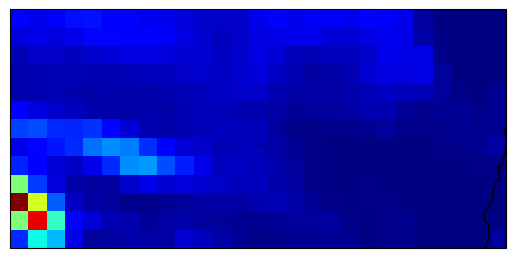

In [34]:
print(qv.shape)
import matplotlib.pyplot as plt
#plt.pcolormesh(qv[0,:,:,2].T,cmap='jet')
import cartopy.crs as ccrs
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lon[ind_lon_min:ind_lon_max],lat[ind_lat_min:ind_lat_max-15],tp_year[:,:,:-15].mean(axis=0).T,cmap='jet')
ax.coastlines()

In [20]:
print(ds['level'].data[[5,7,9,10,12]])
print(ds['land_sea_mask'].shape)
print(ds['geopotential_at_surface'].shape)

[ 300  500  700  850 1000]
(512, 256)
(512, 256)


(48,)
(48,)
(48, 48)


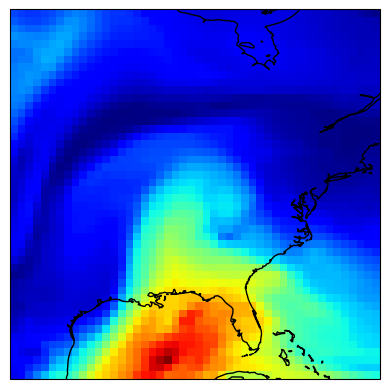

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
print(lon[ind_lon_min:ind_lon_max].shape)
print(lat[ind_lat_min:ind_lat_max].shape)
print(tpw.shape)
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lon[ind_lon_min:ind_lon_max],lat[ind_lat_min:ind_lat_max],
               tpw.T,cmap='jet')
ax.coastlines()